In [1]:
import principal_portfolios as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# FX DATA

# Fama French Test Assets

In [2]:
# adresses to read the files
data_to_read_address = ["data/25_Portfolios_5x5_SizeBM_monthly.csv",
                        "data/25_Portfolios_5x5_SizeOP_monthly.csv",
                        "data/25_Portfolios_5x5_SizeINV_monthly.csv"]
factor_data_address = "data/F-F_Research_Data_5_Factors_2x3.csv"

# initialize function parameters
starting_year_to_filter = 1963
end_year_to_filter = 2020
number_of_lookback_periods = 120
number_of_PPs_to_consider = 3
number_of_PEPs_to_consider = 3
number_of_PAPs_to_consider = 3


# Reading FF factor data
factor_data_monthly = pd.read_csv(factor_data_address)
factor_data_monthly['date'] = pd.to_datetime(factor_data_monthly['date'], format='%Y%m') + pd.offsets.MonthEnd(1)

output_dict = {}
for dataset in data_to_read_address:

    # Reading asset returns.
    portfolios_dataset_df = pd.read_csv(dataset)
    portfolios_dataset_df['date'] = pd.to_datetime(portfolios_dataset_df['date'], format='%Y%m') + pd.offsets.MonthEnd(1)

    signal_df = pd.DataFrame()
    signal_df["date"] = portfolios_dataset_df["date"]
    # Note that I shift signals one period forward to make computations easier. 
    signal_df= signal_df.join(portfolios_dataset_df.iloc[:, 1:].shift(1))

    output_dict[dataset.split("/")[1].split(".csv")[0]] = pp.build_PP(portfolios_dataset_df,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=factor_data_monthly)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict['25_Portfolios_5x5_SizeBM_monthly'].keys())
# output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"]

dict_keys(['25_Portfolios_5x5_SizeBM_monthly', '25_Portfolios_5x5_SizeOP_monthly', '25_Portfolios_5x5_SizeINV_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df', 'regression_result_return_of_simple_factor', 'regression_result_realized_return_of_first_n_PP', 'regression_result_realized_return_of_first_n_PEP', 'regression_result_realized_return_of_first_n_PAP', 'regression_result_PEP and PAP 1-n'])


Plotting the graphs

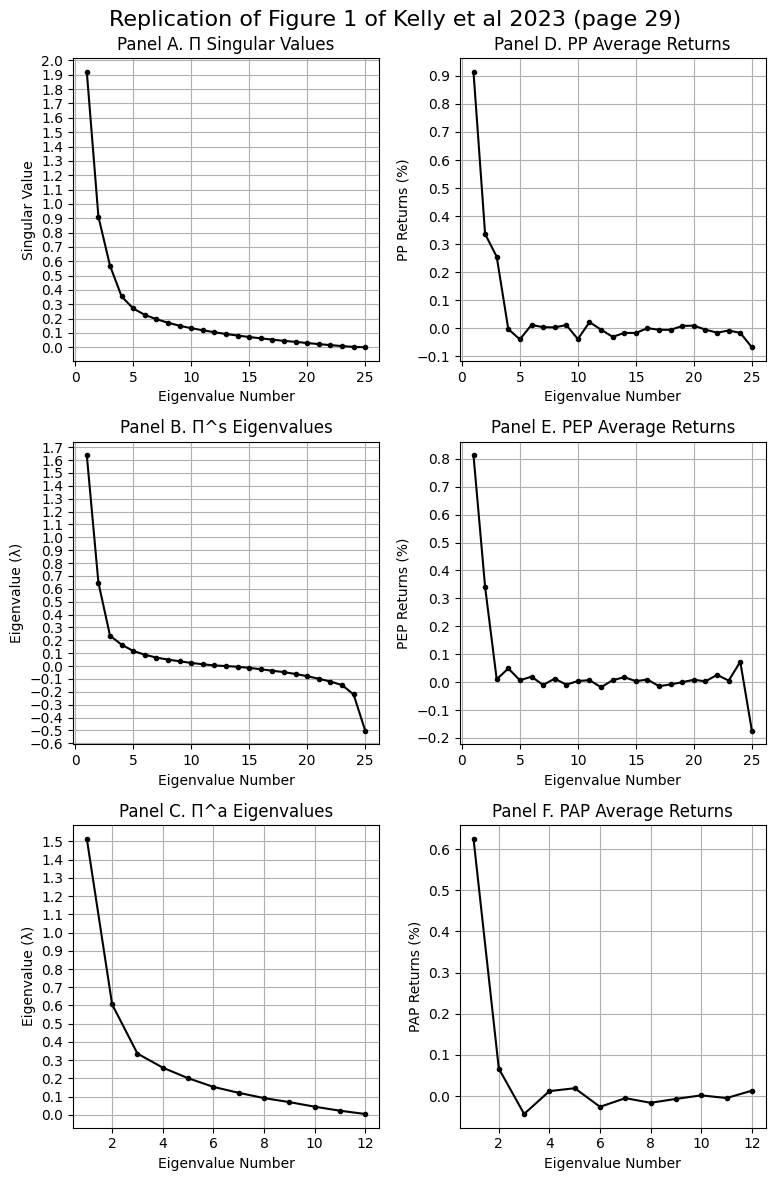

In [5]:
number_of_portfolios = portfolios_dataset_df.shape[1]
portfolios_key = "25_Portfolios_5x5_SizeBM_monthly"
title = 'Replication of Figure 1 of Kelly et al 2023 (page 29)'

pp.singular_values_vs_realized_returns_graph(output_dict, portfolios_key, number_of_portfolios, title)

Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_1.jpg)


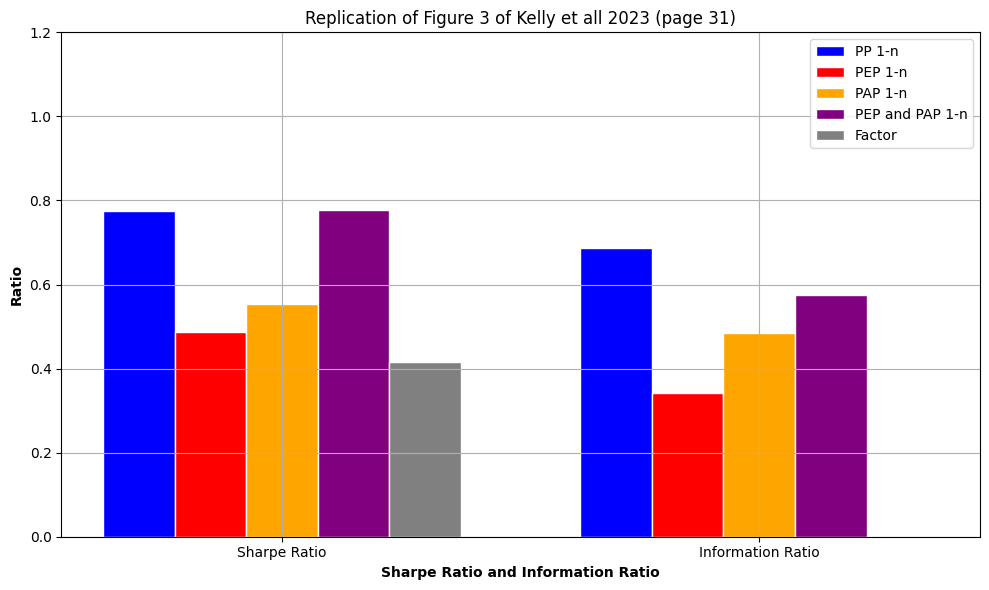

In [4]:
categories = ['Sharpe Ratio', 'Information Ratio']
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio)
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2]]
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2]]
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),0]

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio and Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure 3 of Kelly et all 2023 (page 31)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_3.jpg)


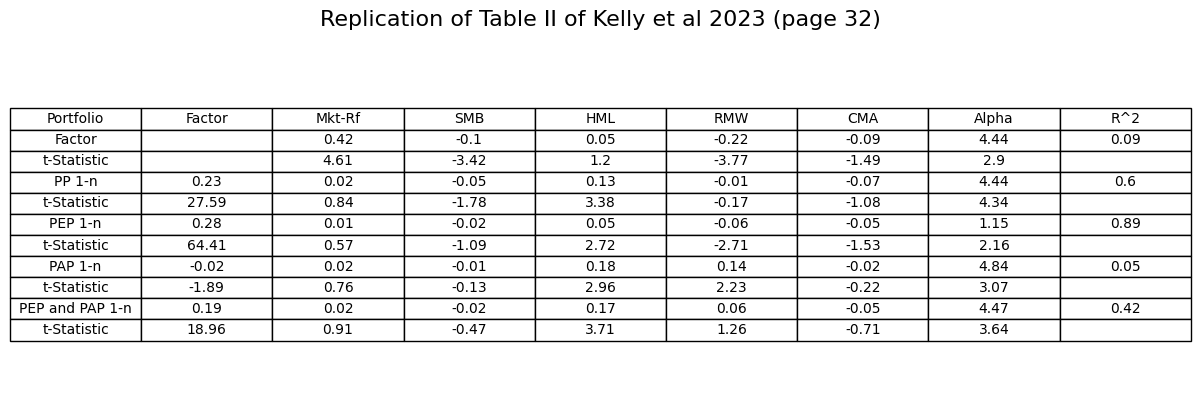

In [5]:
import pandas as pd


# Define the data as a series of lists (each list is a row)
rows = [
    ['Factor',''] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][0].tolist()]
    + [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][3],2)],
    ['t-Statistic',''] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][1].tolist()] + [''] ,

    ['PP 1-n'] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][0].tolist()] +
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][1].tolist()] ,

    ['PEP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][1].tolist()],

    ['PAP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][1].tolist()],

    ['PEP and PAP 1-n'] +
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][1].tolist()]
]

# My ordering of columns when saving the results of regressions is different from Kelly's paper. I do this to make comparison's easier.
rows[0][7],rows[0][2] = rows[0][2], rows[0][7]
rows[1][7],rows[1][2] = rows[1][2], rows[1][7]
for row in rows[2:]:
    row[1], row[7] = row[7], row[1]  

# Define the column names
columns = ['Portfolio', 'Factor', 'Mkt-Rf', 'SMB', 'HML', 'RMW', 'CMA', 'Alpha','R^2']

# Convert the rows into a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Create a matplotlib figure to render the table
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create the table and display it
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set font size and adjust the scale of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

fig.suptitle("Replication of Table II of Kelly et al 2023 (page 32)", fontsize=16)

# Adjust layout to prevent overlap between title and table
plt.tight_layout()

# Adjust the title position to avoid overlap with the table
fig.subplots_adjust(top=0.85)


plt.show()


Below is the replicated table

![alt text](Replicated_tables_or_figures/Table_2.jpg)


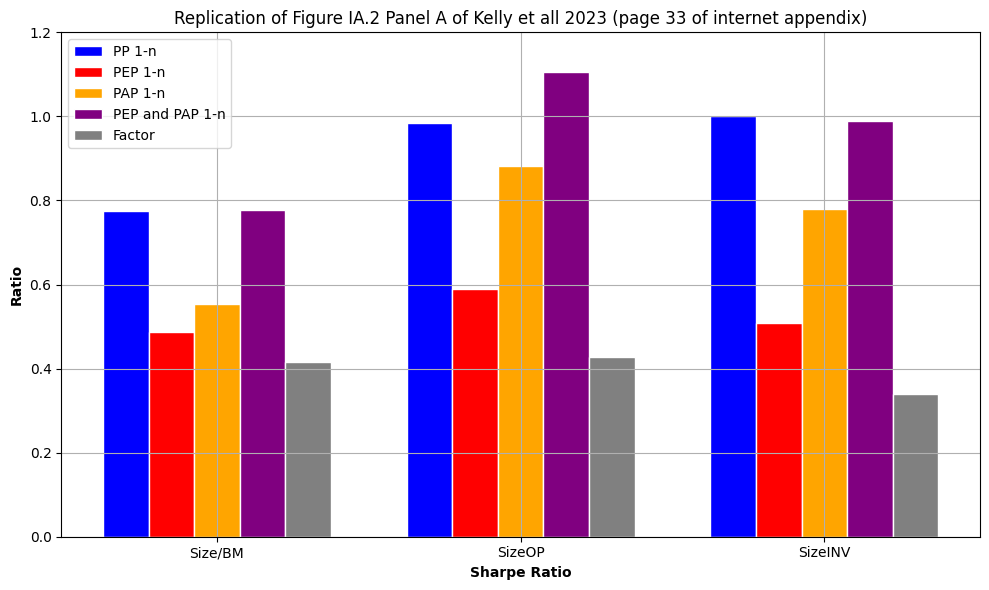

In [6]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PP')]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP')]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP')]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('PEP and PAP 1-n')]  # Add data for new category
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('return_of_simple_factor')]  # Add data for new category

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel A of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_A.jpg)


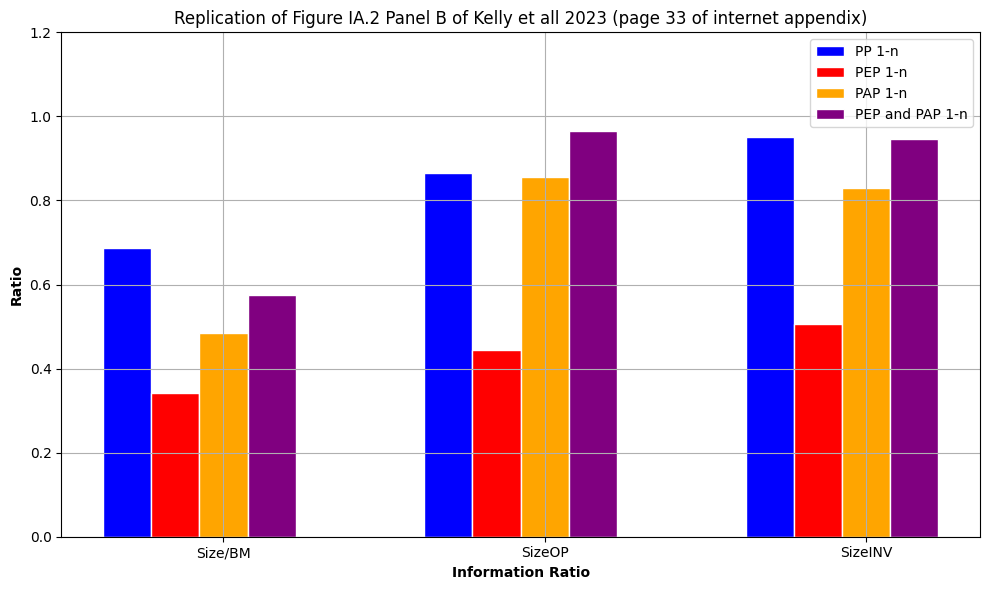

In [7]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PP"][2]]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_PEP and PAP 1-n"][2]]  # Add data for new category


# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')


# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel B of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_B.jpg)
